In [206]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score
import numpy as np

In [207]:
dataset = pd.read_csv(r'C:\Users\SAGNEEK SENGUPTA\Documents\Transformer fault\DGA_dataset.csv')

In [208]:
# Separate features and target
X = dataset[['H2', 'CH4', 'C2H6', 'C2H4', 'C2H2']]
y = dataset['Type']

In [209]:
print("Unique labels in y_train:", set(y_train))
print("Unique labels in y_test:", set(y_test))

Unique labels in y_train: {np.int64(0), np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6)}
Unique labels in y_test: {np.int64(0), np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6)}


In [210]:
all_labels = np.unique(np.concatenate([y_train, y_test]))

In [211]:
label_encoder = LabelEncoder()
# label_encoder.fit(all_labels)
label_encoder.fit(np.concatenate([y_train, y_test]))
y_test_numeric = label_encoder.transform(y_test)
y_train_numeric = label_encoder.transform(y_train)  # Transform y_train



In [212]:
y_encoded = label_encoder.fit_transform(y)

In [213]:
print("Before SMOTE:", Counter(y))

Before SMOTE: Counter({'Arc discharge': 54, 'Spark discharge': 49, 'High-temperature overheating': 38, 'Low-temperature overheating': 19, 'Partial discharge': 16, 'Low/Middle-temperature overheating': 16, 'Middle-temperature overheating': 9})


In [214]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y_encoded, test_size=0.3, random_state=42, stratify=y_encoded)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

In [215]:
print("Shape of X_train:", X_train.shape)
print("Length of y_train:", len(y_train))

Shape of X_train: (140, 5)
Length of y_train: 140


In [216]:
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)


c:\Users\SAGNEEK SENGUPTA\Documents\Transformer fault\transformer\Lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
c:\Users\SAGNEEK SENGUPTA\Documents\Transformer fault\transformer\Lib\site-packages\sklearn\utils\_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


In [235]:
print("After SMOTE:", Counter(y_train_resampled))

After SMOTE: Counter({np.int64(1): 38, np.int64(0): 38, np.int64(4): 38, np.int64(2): 38, np.int64(6): 38, np.int64(3): 38, np.int64(5): 38})


In [218]:
print("Resampled X_train shape:", X_train_resampled.shape)
print("Resampled y_train shape:", y_train_resampled.shape)

Resampled X_train shape: (266, 5)
Resampled y_train shape: (266,)


In [219]:
# Normalize/Scale the data
scaler = StandardScaler()
X_train_resampled_scaled = scaler.fit_transform(X_train_resampled)  # Scale the resampled training data
X_test_scaled = scaler.transform(X_test)

In [220]:
# Outputs to verify
data_shapes = {
    "X_train_shape": X_train_scaled.shape,
    "X_val_shape": X_val_scaled.shape,
    "X_test_shape": X_test_scaled.shape,
    "y_train_classes": len(set(y_train)),
    "y_test_classes": len(set(y_test))
}

In [221]:
data_shapes

{'X_train_shape': (140, 5),
 'X_val_shape': (30, 5),
 'X_test_shape': (31, 5),
 'y_train_classes': 7,
 'y_test_classes': 7}

In [236]:
rf_classifier = RandomForestClassifier()  # Example classifier
rf_classifier.fit(X_train_resampled, y_train_resampled) 

RandomForestClassifier()

In [223]:
# param_grid = {
#     'n_estimators': [50, 100, 200],
#     'max_depth': [None, 10, 20, 30],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4]
# }

# # Use GridSearchCV to find the best hyperparameters
# grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=3, scoring='accuracy')
# grid_search.fit(X_train_resampled_scaled, y_train_resampled)  # Use resampled training data here

# # Get the best model
# best_rf_classifier = grid_search.best_estimator_
# print("Best Hyperparameters:", grid_search.best_params_)


In [237]:
y_val_pred = best_rf_classifier.predict(X_val_scaled)
f1 = f1_score(y_val, y_val_pred, average='weighted')
print("Weighted F1-score on validation data:", f1)

Weighted F1-score on validation data: 0.3159211159211159


In [238]:
feature_importances = best_rf_classifier.feature_importances_
sorted_features = sorted(zip(features, feature_importances), key=lambda x: x[1], reverse=True)

# Print sorted feature importances
print("Sorted Feature Importances:", sorted_features)

Sorted Feature Importances: [('C2H2', np.float64(0.25598085132007514)), ('C2H4', np.float64(0.22336314817400274)), ('H2', np.float64(0.19749952771651214)), ('CH4', np.float64(0.16819647509247507)), ('C2H6', np.float64(0.15495999769693494))]


In [239]:
# Normalize/Scale the data
scaler = StandardScaler()
X_train_resampled_scaled = scaler.fit_transform(X_train_resampled)  # Scale the resampled training data
X_test_scaled = scaler.transform(X_test)

In [240]:
print("Labels in y_test:", set(y_test))
print("Labels in label_encoder.classes_:", set(label_encoder.classes_))


Labels in y_test: {np.int64(0), np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6)}
Labels in label_encoder.classes_: {'Arc discharge', 'Partial discharge', 'Spark discharge', 'Middle-temperature overheating', 'Low/Middle-temperature overheating', 'Low-temperature overheating', 'High-temperature overheating'}


In [241]:
try:
    y_test_numeric = label_encoder.transform(y_test)
except ValueError as e:
    print(f"Error: {e}")

Error: y contains previously unseen labels: 6


In [242]:
# Evaluate on test data
# Convert y_test to numeric format using LabelEncoder
# y_test_numeric = label_encoder.transform(y_test)
y_test_pred = rf_classifier.predict(X_test_scaled)
print("Classification Report:\n", classification_report(y_test_numeric, y_test_pred, target_names=label_encoder.classes_))


Classification Report:
                                     precision    recall  f1-score   support

                     Arc discharge       0.00      0.00      0.00         8
      High-temperature overheating       0.00      0.00      0.00         6
       Low-temperature overheating       0.00      0.00      0.00         3
Low/Middle-temperature overheating       0.00      0.00      0.00         3
    Middle-temperature overheating       0.04      1.00      0.07         1
                 Partial discharge       0.00      0.00      0.00         2
                   Spark discharge       0.67      0.25      0.36         8

                          accuracy                           0.10        31
                         macro avg       0.10      0.18      0.06        31
                      weighted avg       0.17      0.10      0.10        31



c:\Users\SAGNEEK SENGUPTA\Documents\Transformer fault\transformer\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
c:\Users\SAGNEEK SENGUPTA\Documents\Transformer fault\transformer\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\SAGNEEK SENGUPTA\Documents\Transformer fault\transformer\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\SAGNEEK SENGUPTA\Documents\

In [230]:
# Feature importance analysis
feature_importances = rf_classifier.feature_importances_
features = ['H2', 'CH4', 'C2H6', 'C2H4', 'C2H2']

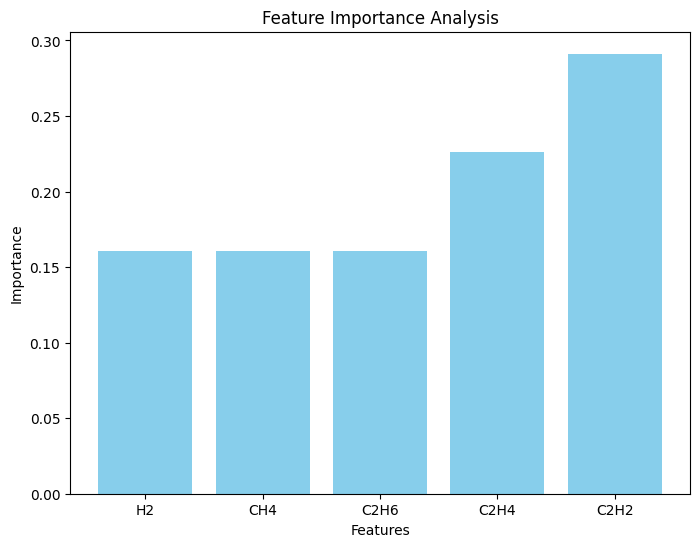

In [231]:
# Plot feature importances
plt.figure(figsize=(8, 6))
plt.bar(features, feature_importances, color='skyblue')
plt.title('Feature Importance Analysis')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()

In [232]:
# Outputs to verify
data_shapes = {
    "X_train_shape": X_train_scaled.shape,
    "X_val_shape": X_val_scaled.shape,
    "X_test_shape": X_test_scaled.shape,
    "y_train_classes": len(set(y_train)),
    "y_test_classes": len(set(y_test))
}

val_accuracy, data_shapes

(0.0,
 {'X_train_shape': (140, 5),
  'X_val_shape': (30, 5),
  'X_test_shape': (31, 5),
  'y_train_classes': 7,
  'y_test_classes': 7})